In [15]:
import pandas as pd
import numpy as np
import json
import os
import sklearn
import patsy
%matplotlib inline

In [3]:
#os.listdir('/home/ds/notebooks/Data')

In [5]:
df=pd.read_csv('/home/ds/notebooks/Data/retention.csv')

In [13]:
df.groupby('Retention').size()

Retention
0    2375
1    3248
dtype: int64

In [12]:
pd.crosstab(df['Retention'], df['Active_Days'], rownames=['retention'],colnames=['Active_Days'])

Active_Days,1,2,3,4,5,6,7
retention,,,,,,,
0,1359,503,247,140,83,29,14
1,261,295,371,364,425,521,1011


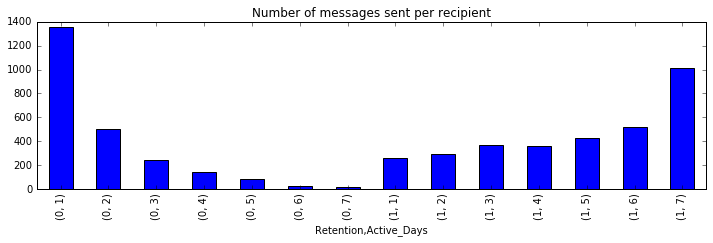

In [29]:
df.groupby(['Retention','Active_Days']).size().plot(
    kind='bar', figsize=(12,3), title='Number of messages sent per recipient')

In [ ]:
ax = messages.groupby('prev_sender')['conversation_id'].size().plot(
    kind='bar', figsize=(12,3), title='Number of messages sent per recipient', color=colors[0])
_ = ax.set_xlabel('Previous Sender')
_ = ax.set_ylabel('Number of messages')
_ = plt.xticks(rotation=45)

In [17]:
pd.crosstab(df['Retention'], df['Active_Days'], rownames=['retention'],colnames=['Active_Days'])\
.plot(kind='scatter',x='Active_Days')

ValueError: scatter requires and x and y column

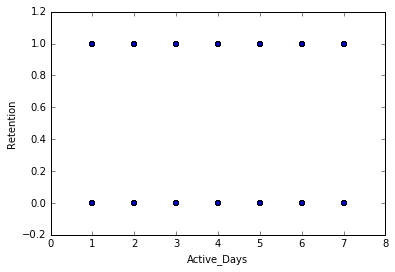

In [16]:
df.plot(kind='scatter',x='Active_Days',y='Retention')

In [14]:
msk = np.random.rand(len(df)) < 0.8
df_train=df[msk]
df_test=df[~msk]
print "Training set has {0} observations and Test set has {1} observations.".format(len(df_train),len(df_test))

Training set has 4485 observations and Test set has 1138 observations.


In [15]:
df=df.drop(['Unnamed: 0'], axis=1)

In [18]:
exclude_cols = ['Retention']
Y=df_train['Retention']
df_train=df.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))

In [16]:
df.head()

,User ID,Week,Active_Days,Group,Install_Date_Category,Retention,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit
0,1,1,7,A,Day 1,1,2,11,3,51,285,19,49,86
1,2,1,4,A,Day 2,1,1,9,0,7,11,4,4,16
2,3,1,7,A,Day 1,1,0,12,5,19,147,8,25,101
3,4,1,7,A,Day 2,1,4,6,8,17,84,7,13,73
4,5,1,2,A,Day 3,0,1,0,1,1,2,0,0,3


In [19]:
df_train.head()

,User ID,Week,Active_Days,Group,Install_Date_Category,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit
0,1,1,7,A,Day 1,2,11,3,51,285,19,49,86
1,2,1,4,A,Day 2,1,9,0,7,11,4,4,16
2,3,1,7,A,Day 1,0,12,5,19,147,8,25,101
3,4,1,7,A,Day 2,4,6,8,17,84,7,13,73
4,5,1,2,A,Day 3,1,0,1,1,2,0,0,3


In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#data = load_iris()

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_train.filter('Install_Date_Category'), Y)

#rules(clf, data.feature_names, data.target_names)

ValueError: Found array with 0 feature(s) (shape=(5623, 0)) while a minimum of 1 is required.

In [27]:
for x in df.columns:
    if x != 'Install_Date_Category':
        print x,
    else:
        pass

User ID Week Active_Days Group Retention Dig Fly Hop Jump Run Sit Skip Visit
